In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import collections # Lib to count values
import random # Lib to generate random numbers

import networkx as nx
from networkx.utils.random_sequence import powerlaw_sequence #Create a powerlaw distribution using the gamma and number of nodes
from networkx.algorithms.graphical import is_graphical #Verify if the sequence of degrre is graphical

<h3 align="center">  Parametes </h3>

In [2]:
gamma = 2.2 # The gamma value (expoent of degree)
N = 10 ** 3 # Number of Nodes
K_min = 1 # The minium degree of the graph

df_metrics = pd.DataFrame() # Dataframe with de metrics (selfloops and multi-links)
df_metrics['N'] = [N, N*10, N*100] # Ns will be tested
list_seeds = [] # List of seed used in the distributions

<h3 align="center">  Finding the Kmax </h3>
<h3 align="center">  $k_{\max }  = k_{\min } N^{\frac{1}{{\gamma  - 1}}}$ </h3>


In [3]:
def get_kmax(K_min=K_min, N=N, gamma=gamma):
    '''
    K_min: Minimun degree of the graph
    N: Total the nodes in the graph
    gamma: degree exponent to the power law
    '''
    
    k_max = round(K_min * (N ** (1/(gamma -1)))) # The max degree
    
    return k_max

<h3 align="center"> Making the degree sequence (NetworkX)</h3>

In [4]:
def get_list_of_degrees(N):
    '''
    N: total de nodes that network need to have
    
    This function recives a number of nodes and return a list of degrees following th power law distribution
    '''
    while True:

#         seed = random.randint(1,20000) # Select a random seed to generate the list of edges

        seed = 546 # This seed works for all Ns tested
        list_of_degs = [round(pk) for pk in powerlaw_sequence(N, exponent=gamma, seed=seed)] # Use power law dist
        
        if is_graphical(list_of_degs): # Test if the sequence of degree is valid
            print(f'Seed to generate the distribution with {N} nodes: {seed}') # Show the seed used
            list_seeds.append(seed)
            return list_of_degs

<h3 align="center">  Making the Pk distribution</h3>

In [5]:
def dotted_pk_line(k):
    '''
    k: degree to calculate the probability with gamma
    
    This functio recive a degree and return it exponed by - gamma
    '''
    return k ** -gamma

In [6]:
def degree_distribution(list_of_degs):
    '''
    list_of_degs: List of all degrees in the network
    
    This function get the distribution of list of nodes created by the power law distribution, and return
    the list with cumulative probability and dictionary with each unique degree.
    '''

    dict_cumulative_degree = {} # Dict with how many nodes are degree equal or bigest that

    for deg in (np.unique(list_of_degs)):
        dict_cumulative_degree[deg] = len([element for element in list_of_degs if deg < element])

    list_cumulative_prob = list(map(lambda x: (x[1]/len(list_of_degs)), dict_cumulative_degree.items()))
    
    return list_cumulative_prob, dict_cumulative_degree

In [7]:
def K_gamma_distribution(list_of_degs):
    '''
    list_of_degs: List of all degrees in the network
    
    This function get the values for K^-2.2 for all Ks in the power law distribution
    '''
    dict_pk_line = {}
    for deg in np.unique(list_of_degs):
        dict_pk_line[deg] = dotted_pk_line(deg)
        
    return dict_pk_line

In [8]:
def plot_distributions(N, dict_pk_line, list_cumulative_prob, dict_cumulative_degree, axs):
    '''
    N: Number of nodes in the graph
    dict_pk_line: dictionary with the values of degree^-gamma
    list_cumulative_prob: list with the probability to have a node with degree biggest that actual
    dict_cumulative_degree: dictionary with each unique degree in the sequence of degrees
    axs: name of axes that will by ploted using matplotlib.
    
    This function plot the degree destribution of a sequence os degrees (blue points), and a red dotted line 
    with de degree^-gamma.
    '''
    
    axs.scatter(dict_cumulative_degree.keys(), list_cumulative_prob, label='Power law')
    axs.plot([min(dict_cumulative_degree.keys()), max(dict_cumulative_degree.keys())], 
         [max(dict_pk_line.values()), min(dict_pk_line.values())], '--r' , label='k^-2.2')
    axs.set_title(f'Degree distribution for 10^{int(np.log10(N))} nodes')
    axs.set_xlabel('log(k)')
    axs.set_ylabel('log(Pk)')
    axs.set_xscale('log')
    axs.set_yscale('log')
    axs.legend()

    axs.set_ylim(11 ** - int(np.log10(N)))

<h3 align="center">  Calculating for each N</h3>

Ploting the degree distribution for each N and the dotted line with $k^{-2.2}$

Seed to generate the distribution with 1000 nodes: 546
Seed to generate the distribution with 10000 nodes: 546
Seed to generate the distribution with 100000 nodes: 546


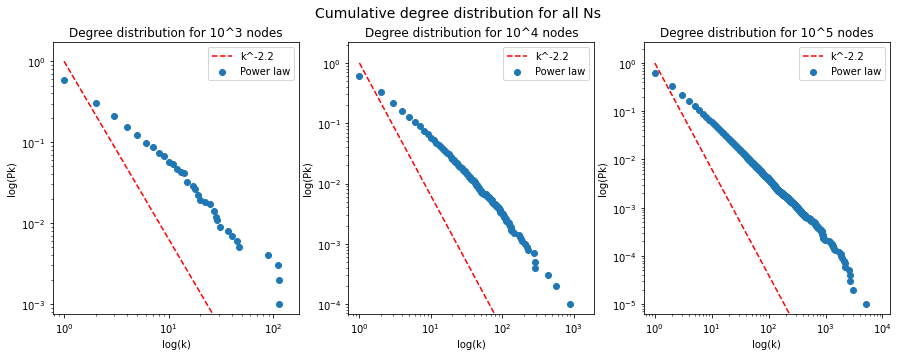

In [9]:
all_list_of_degree = []

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

fig.suptitle('Cumulative degree distribution for all Ns', fontsize=14)

# Plot N = 10^3
list_of_degs = get_list_of_degrees(df_metrics['N'][0])
all_list_of_degree.append(list_of_degs)
list_cumulative_prob, dict_cumulative_degree = degree_distribution(list_of_degs)
dict_pk_line = K_gamma_distribution(list_of_degs)
plot_distributions(df_metrics['N'][0], dict_pk_line, list_cumulative_prob, dict_cumulative_degree, ax1)

# Plot N = 10^4
list_of_degs_2 = get_list_of_degrees(df_metrics['N'][1])
all_list_of_degree.append(list_of_degs_2)
list_cumulative_prob_2, dict_cumulative_degree_2 = degree_distribution(list_of_degs_2)
dict_pk_line_2 = K_gamma_distribution(list_of_degs_2)
plot_distributions(df_metrics['N'][1], dict_pk_line_2, list_cumulative_prob_2, dict_cumulative_degree_2, ax2)
               
# Plot N = 10^5
list_of_degs_3= get_list_of_degrees(df_metrics['N'][2])
all_list_of_degree.append(list_of_degs_3)
list_cumulative_prob_3, dict_cumulative_degree_3 = degree_distribution(list_of_degs_3)
dict_pk_line_3 = K_gamma_distribution(list_of_degs_3)
plot_distributions(df_metrics['N'][2], dict_pk_line_3, list_cumulative_prob_3, dict_cumulative_degree_3, ax3)


<h3 align="center"> Number of node in the graph </h3>
<h3 align="center">$N = \left( {\frac{{k_{max} }}{{k_{\min } }}} \right)^{\gamma  - 1}$</h3> 

In [10]:
k_max = get_kmax()
print(f'Following the formula this network with 10^3 nodes can have approximately {int((k_max/K_min) ** (gamma - 1))} nodes ')

k_max = get_kmax(N=N *10)
print(f'Following the formula this network with 10^4 nodes can have approximately {int((k_max/K_min) ** (gamma - 1))} nodes ')

k_max = get_kmax(N=N *100)
print(f'Following the formula this network with 10^5 nodes can have approximately {int((k_max/K_min) ** (gamma - 1))} nodes ')

Following the formula this network with 10^3 nodes can have approximately 999 nodes 
Following the formula this network with 10^4 nodes can have approximately 9997 nodes 
Following the formula this network with 10^5 nodes can have approximately 100000 nodes 


<h3 align="center">  Configuration model (NetworkX)</h3>

In [11]:
def count_multi_edges(G):
    '''
    G: A graph
    
    This function return the total of multi edges in a graph (multi edges is considered the total of
    edges between two nodes, when the total is biggest taht one).
    For exemplate: Between node A and B have 3 links, whe count 2 multi links.
    '''
    multi_edges = []
    for node in G.nodes():
        for neig in G.neighbors(node):
            if node != neig: # Disconsider the self loops in multi links
                multi_edges.append(max(G.number_of_edges(node, neig)-1, 0))

    return round((sum(multi_edges)*0.5) / G.number_of_edges() * 100, 2)

In [12]:
def count_self_loops(G):
    '''
    G: A graph
    
    This function return the total os self links in the grapg G (self links is when the origin and destine node are the same).
    '''
    return round(len(list(nx.selfloop_edges(G))) / G.number_of_edges() * 100, 2)

In [13]:
list_self_loops = [] # List with % of self loops in the each N
list_multi_links = [] # List with % of multi graphs in the each N

for idx_N in range(df_metrics.index.size): # Loop para create and calcule the metrics for each N in df_metrics
    G_temp = nx.configuration_model(all_list_of_degree[idx_N], seed=list_seeds[idx_N])
    list_self_loops.append(count_self_loops(G_temp))
    list_multi_links.append(count_multi_edges(G_temp))
    
df_metrics['% loops'] = list_self_loops
df_metrics['% multi-links'] = list_multi_links
df_metrics['seed'] = list_seeds

df_metrics

,N,% loops,% multi-links,seed
0,1000,0.43,5.87,546
1,10000,0.30,3.99,546
2,100000,0.07,3.97,546


In [14]:
# Save the metrics in a csv file
# df_metrics.to_csv('homework_7_metrics.csv')